In [161]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Phase Change

The task is related to Fourier Transforms. It will study the magnitude and phase.

## Step 1. 

Load two grayscale images. 

(512, 512)

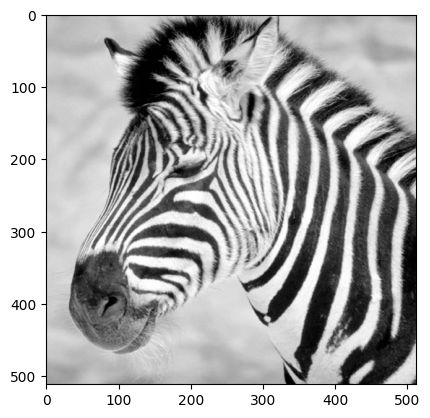

In [162]:
zebra = cv2.imread('zebra.png', 0)
plt.imshow(zebra, cmap = "gray")
zebra.shape

(512, 512)

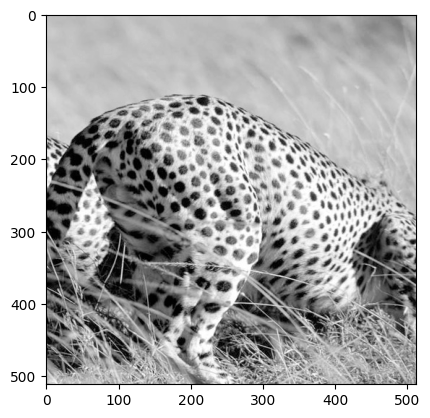

In [163]:
cheetah = cv2.imread('cheetah.png', 0)
plt.imshow(cheetah, cmap = "gray")
cheetah.shape

## Step 2. 
Convert them to the Fourier domain. 

###### Use `fft2()`

In [164]:
dftZebra = np.fft.fftshift(cv2.dft(np.float32(zebra), flags = cv2.DFT_COMPLEX_OUTPUT))
print(dftZebra.shape)
mZebra, aZebra = cv2.cartToPolar(dftZebra[:,:,0], dftZebra[:,:,1])

(512, 512, 2)


In [165]:
dftCheetah = np.fft.fftshift(cv2.dft(np.float32(cheetah), flags = cv2.DFT_COMPLEX_OUTPUT))
mCheetah, aCheetah = cv2.cartToPolar(dftCheetah[:, :, 0], dftCheetah[:, :, 1])

## Step 3.
Plot the magnitude and phase of the two Fourier Transforms.

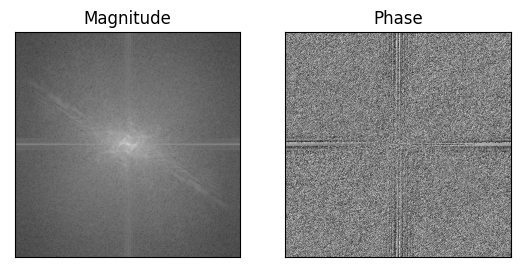

In [166]:
plt.subplot(121), plt.imshow(20*np.log(mZebra), cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(aZebra, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()

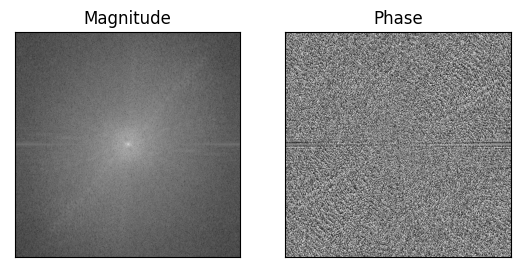

In [167]:
plt.subplot(121), plt.imshow(20*np.log(mCheetah), cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(aCheetah, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()

## Step 4.
Now try switching the phase between the two Fourier Transforms and reconstruct the original images.

If you have the magnitude, say |C| and the phase, say θ, of the Fourier complex numbers, you can use this formula to convert back to the original complex numbers.

```
C = |C|(cosθ + jsinθ)
```

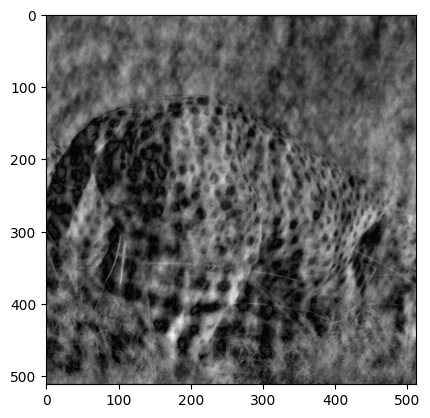

In [168]:
bZebra = np.stack((mZebra * np.cos(aCheetah), mZebra * np.sin(aCheetah)), axis = 2)
zC = cv2.idft(np.float32(np.fft.ifftshift(bZebra)), flags = cv2.DFT_SCALE)
plt.imshow(cv2.magnitude(zC[:, :, 0], zC[:, :, 1]), cmap = "gray")

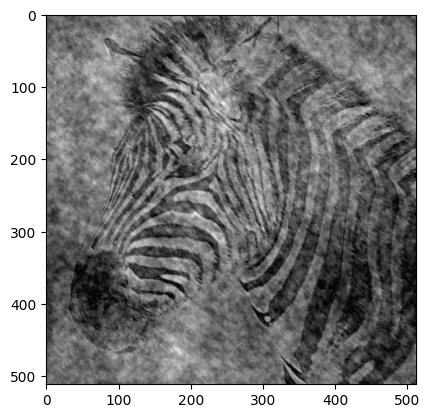

In [169]:
bCheetah = np.stack((mCheetah * np.cos(aZebra), mCheetah * np.sin(aZebra)), axis = 2)
cZ = cv2.idft(np.float32(np.fft.ifftshift(bCheetah)), flags = cv2.DFT_SCALE)
plt.imshow(cv2.magnitude(cZ[:, :, 0], cZ[:, :, 1]), cmap = "gray")